# Movie Recommendation System
Problem statement- To recommed movies to a given user based on his preference/ past experience

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Six datasets provided- importing all the datasets

In [ ]:
scores= pd.read_csv('genome-scores.csv')
gm_tags=pd.read_csv('genome-tags.csv')
links=pd.read_csv('links.csv')
movies=pd.read_csv('movies.csv')
ratings= pd.read_csv('ratings.csv')
tags=pd.read_csv('tags.csv')

In [ ]:
movies_tags=movies.copy()

# Exploratory Data Analysis (EDA)

Genome tags and Genome scores(Know-about)-
The tag genome is a data structure that contains tag relevance scores for movies.
the tag genome encodes how strongly movies exhibit particular properties represented by tags (atmospheric, thought-provoking, realistic, etc.). The tag genome was computed using a machine learning algorithm on user-contributed content including tags, ratings, and textual reviews.

Tags relevance-We classify items with a relevance prediction of 1/3 or less as low relevance, those with a predicted relevance of 1/2 to 2/3 as medium relevance, and those with a predicted relevance of 2/3 or higher as high relevance.[Taken from documentation attatched to it.]
http://files.grouplens.org/papers/tag_genome.pdf

In [ ]:
# Pre-processing1=only kept data with relevance greater than 0.5
print(scores.shape)
scores.sort_values(by='relevance', ascending=False)
scores=scores[scores.relevance> 0.5]
scores

(14862528, 3)


,movieId,tagId,relevance
10,1,11,0.58700
18,1,19,0.66825
28,1,29,0.90700
29,1,30,0.60850
60,1,61,0.59575
...,...,...,...
14862370,187595,971,0.88225
14862371,187595,972,0.61525
14862469,187595,1070,0.56225
14862491,187595,1092,0.61225


(array([3.000e+00, 5.000e+01, 3.660e+02, 1.603e+03, 3.856e+03, 4.250e+03,
        2.254e+03, 6.530e+02, 1.270e+02, 1.400e+01]),
 array([0.53441667, 0.56316736, 0.59191806, 0.62066875, 0.64941944,
        0.67817014, 0.70692083, 0.73567153, 0.76442222, 0.79317292,
        0.82192361]),
 <BarContainer object of 10 artists>)

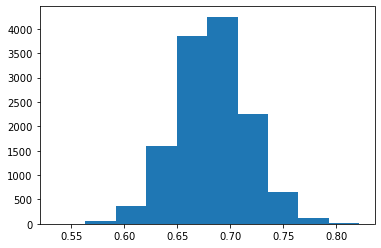

In [ ]:
plt.hist(scores.groupby('movieId')['relevance'].mean())                 #Relevant tags show a normal distribution.

In [ ]:
print(scores.nunique())                  #It inferred that only 13176 movies have been tagged.

movieId      13176
tagId         1126
relevance     2000
dtype: int64


### Tags table


In [ ]:
gm_tags

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
...,...,...
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie


In [ ]:
gm_tags.nunique()

tagId    1128
tag      1128
dtype: int64

In [ ]:
gm_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


### Links table

In [ ]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
links.nunique()

movieId    58098
imdbId     58098
tmdbId     57877
dtype: int64

#####Movies table

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


We have 78 duplicate movies and about 4266 movies that have no genres listed.
Also, as described in description- 'Movie titles are entered manually or imported from https://www.themoviedb.org/, and include the year of release in parentheses. Errors and inconsistencies may exist in these titles'.

Hence, MovieIds are the unique IDs.

In [ ]:
movies['title'].duplicated().value_counts()

False    58020
True        78
Name: title, dtype: int64

### Preprocessing-
Movies with duplicate title are tagged with duplicate it their titles


In [ ]:
duplicates=movies[movies['title'].duplicated()==True]

In [ ]:
movies=movies[movies['title'].duplicated()==False]               #removing duplicates from the movies.

In [ ]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed)
58094,193878,Les tribulations d'une caissière (2011),Comedy
58095,193880,Her Name Was Mumu (2016),Drama
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi


In [ ]:
duplicates.loc[:,'title']=duplicates['title'].apply(lambda x: x+'duplicate')       #renaming duplicate movies.

In [ ]:
duplicates

,movieId,title,genres
9142,26958,Emma (1996)duplicate,Romance
9157,26982,Men with Guns (1997)duplicate,Drama
13309,64997,War of the Worlds (2005)duplicate,Action|Sci-Fi
13395,65665,Hamlet (2000)duplicate,Drama
13614,67459,Chaos (2005)duplicate,Crime|Drama|Horror
...,...,...,...
57269,191775,Berlin Calling (2008)duplicate,Comedy|Drama
57305,191867,Let There Be Light (2017)duplicate,Documentary
57361,192003,Journey to the Center of the Earth (2008)dupli...,Action|Adventure|Fantasy|Sci-Fi
57463,192243,Contact (1992)duplicate,Drama|Horror|Mystery|Thriller


In [ ]:
movies=pd.concat([movies,duplicates],axis=0)

In [ ]:
movies.sort_index(inplace=True)

In [ ]:
movies['title'].duplicated().value_counts()

False    58098
Name: title, dtype: int64

In [ ]:
movies1=movies.copy()             #required

In [ ]:
################

In [ ]:
movies.nunique()

movieId    58098
title      58098
genres      1643
dtype: int64

In [ ]:
movies['genres'].value_counts()

Drama                                      8402
Comedy                                     5372
(no genres listed)                         4266
Documentary                                4250
Comedy|Drama                               2212
                                           ... 
Action|Adventure|Animation|Drama|Sci-Fi       1
Drama|Fantasy|Horror|Mystery|Romance          1
Film-Noir|Thriller|War                        1
Comedy|Musical|Romance|War                    1
Adventure|Animation|Crime                     1
Name: genres, Length: 1643, dtype: int64

In [ ]:
#movies=movies[movies['genres']!='(no genres listed)']
#movies=pd.DataFrame(movies[movies['title'].duplicated()==False])
#movies
#4266 movies have no genres listed.

##### Ratings table

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [ ]:
ratings.nunique()

userId         283228
movieId         53889
rating             10
timestamp    22131556
dtype: int64

->>From above we can infer that out of 58020 movies only 53889 movies have been rated.

Text(0, 0.5, 'Count_of_rating_given')

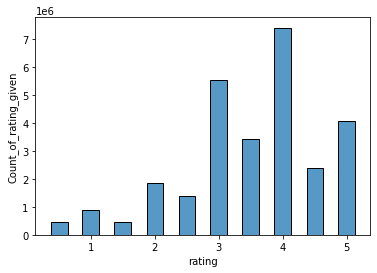

In [ ]:
sns.histplot(data=ratings, x='rating',shrink=40)
plt.ylabel('Count_of_rating_given')

In [ ]:
ratings.shape

(27753444, 4)

Tags table-
This contains User generated tags whose relevant score is not given.

In [ ]:
tags.head()                       # this dataset seems to have comments and not looks of much use.

,userId,movieId,tag,timestamp
0,14,110,epic,1443148538
1,14,110,Medieval,1443148532
2,14,260,sci-fi,1442169410
3,14,260,space action,1442169421
4,14,318,imdb top 250,1442615195


In [ ]:
tags.nunique()

userId        19325
movieId       45981
tag           74714
timestamp    911869
dtype: int64

In [ ]:
tags.shape

(1108997, 4)

In [ ]:
merged_data=pd.merge(ratings,movies,on='movieId')

In [ ]:
merged_data

,userId,movieId,rating,timestamp,title,genres
0,1,307,3.5,1256677221,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
1,6,307,4.0,832059248,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
2,56,307,4.0,1383625728,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,71,307,5.0,1257795414,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
4,84,307,3.0,999055519,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
...,...,...,...,...,...,...
27753439,282403,167894,1.0,1524243885,Stranglehold (1994),Action
27753440,282732,161572,3.5,1504408070,The Great Houdini (1976),Drama
27753441,283000,117857,3.5,1417317969,Hotline (2014),Documentary
27753442,283000,133409,3.5,1431539331,Barnum! (1986),(no genres listed)


In [ ]:
data=pd.DataFrame(merged_data['movieId'].value_counts())

In [ ]:
data.reset_index(inplace=True)

In [ ]:
data.columns=['movieId','no_of_reviews']

In [ ]:
data=pd.merge(data,movies,on='movieId')

In [ ]:
data

,movieId,no_of_reviews,title,genres
0,318,97999,"Shawshank Redemption, The (1994)",Crime|Drama
1,356,97040,Forrest Gump (1994),Comedy|Drama|Romance|War
2,296,92406,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,593,87899,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
4,2571,84545,"Matrix, The (1999)",Action|Sci-Fi|Thriller
...,...,...,...,...
53884,165077,1,London in the Raw (1965),Documentary
53885,172453,1,Survivor (1999),Action|Horror|Sci-Fi
53886,192975,1,Isabelle (2011),Drama|Mystery|Thriller
53887,167092,1,Dirch Passer vælter byen (1954),(no genres listed)


In [ ]:
df=merged_data.groupby('movieId')['rating'].mean().sort_values(ascending=False)

In [ ]:
df                                                                  #These are top rated movies but can it may happen that only single or few users rated it.

movieId
169338    5.0
187729    5.0
172149    5.0
160966    5.0
134387    5.0
         ... 
133810    0.5
170255    0.5
160614    0.5
170259    0.5
148749    0.5
Name: rating, Length: 53889, dtype: float64

In [ ]:
data=pd.merge(data,df,on='movieId')

In [ ]:
data

,movieId,no_of_reviews,title,genres,rating
0,318,97999,"Shawshank Redemption, The (1994)",Crime|Drama,4.424188
1,356,97040,Forrest Gump (1994),Comedy|Drama|Romance|War,4.056585
2,296,92406,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.173971
3,593,87899,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.151412
4,2571,84545,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.149695
...,...,...,...,...,...
53884,165077,1,London in the Raw (1965),Documentary,4.000000
53885,172453,1,Survivor (1999),Action|Horror|Sci-Fi,2.500000
53886,192975,1,Isabelle (2011),Drama|Mystery|Thriller,2.500000
53887,167092,1,Dirch Passer vælter byen (1954),(no genres listed),3.500000


In [ ]:
#data file contains all the basic information about a movie dataset- Combined datasets info.
#data.to_csv('data_rev_rat')

Inference from data file- There is a wide spread in the no of viewers.Movies can be reviewed from the range of from 1 to 97000 users. Hence, with ratings, no of reviewers need to be taken into account.

### Top most popular movies

Text(0, 0.5, 'movie_title')

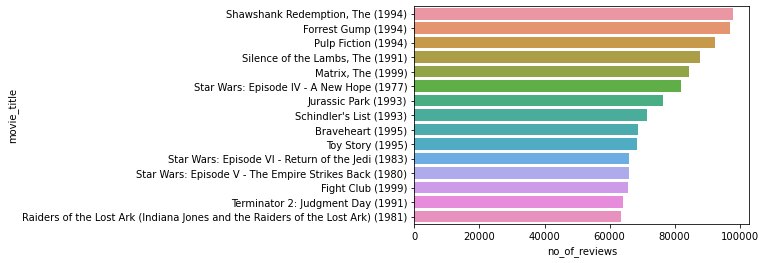

In [ ]:
sns.barplot(data=data[:15], x='no_of_reviews',y='title')
plt.ylabel('movie_title')

Inference- One more point to notice that top most watched movies are from year 1990s.

### Top most rated movies.

Text(0.5, 0, 'avg_ratings')

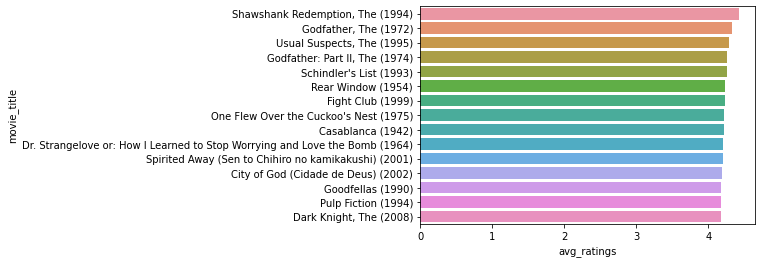

In [ ]:
sns.barplot(data=data[data['no_of_reviews']>20000].sort_values(by=['rating'],ascending=False)[:15],x='rating',y='title')
plt.ylabel('movie_title')
plt.xlabel('avg_ratings')

In [ ]:
#def category(x):
#    if x < 101:
#        return 'less'
#    if x > 100:
#        return 'more'

#data['count'] = data['no_of_reviews'].apply(category)

In [ ]:
#sns.distplot(data[data['count']=='less']['no_of_reviews'], bins = 11,kde=False)

In [ ]:
#basically we want to find the ratings for the movie and how many people gave that rating.

In [ ]:
pd.DataFrame(data[data['no_of_reviews']==1].value_counts())

,,,,,0
movieId,no_of_reviews,title,genres,rating,
25892,1,"Heavenly Body, The (1944)",Comedy|Romance,3.0,1
176955,1,It's Gawd! (2017),Comedy|Drama,3.5,1
176867,1,Raggedy Ann and Raggedy Andy in the Pumpkin Who Couldn't Smile (1979),Animation|Children,0.5,1
176897,1,Those Who Make Revolution Halfway Only Dig Their Own Graves (2016),(no genres listed),4.0,1
176901,1,Neowolf (2010),Horror|Thriller,1.0,1
...,...,...,...,...,...
144942,1,Forest of the Damned (2005),Horror,3.0,1
144952,1,The Collectors (1999),(no genres listed),0.5,1
144974,1,Eclipse (1999),Documentary,4.0,1


Inference- 10155 movies in the dataset are been reviewed by single user.

In [ ]:
data.corr()

,movieId,no_of_reviews,rating
movieId,1.000000,-0.261092,-0.091293
no_of_reviews,-0.261092,1.000000,0.110087
rating,-0.091293,0.110087,1.000000


Inference- No significant corr bw ratings and no of reviews. There are movies which have high reviews and good rating but since dataset is too big no significant corr

From here this can be inferred that a huge no of movies are rated bw 3 to 4 and having large no of reviews~ popularity based movies


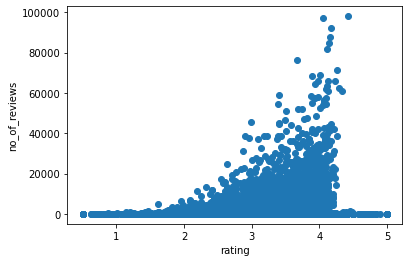

In [ ]:
#Checking how review and ratings are related.
plt.scatter(data['rating'],data['no_of_reviews'])
plt.xlabel('rating')
plt.ylabel('no_of_reviews')
print('From here this can be inferred that a huge no of movies are rated bw 3 to 4 and having large no of reviews~ popularity based movies')

In [ ]:
#Analysing movies dataset on no of reviews.
c1=0
c5=0
c10=0
c20=0
c30=0
c40=0
c50=0
c60=0
c70=0
c80=0
c90=0
c100=0
c=0
for i in data['no_of_reviews']:
    if i==1:
        c1=c1+1
    elif i<=5:
        c5=c5+1
    elif i<=10:
        c10=c10+1
    elif i<=20:
        c20=c20+1
    elif i<=30:
        c30=c30+1
    elif i<=40:
        c40=c40+1
    elif i<=50:
        c50=c50+1
    elif i<=60:
        c60=c60+1
    elif i<=70:
        c70=c70+1
    elif i<=80:
        c80=c80+1
    elif i<=90:
        c90=c90+1
    elif i<=100:
        c100=c100+1
    else:
        c=c+1
COUNT=[c1,c5,c10,c20,c30,c40,c50,c60,c70,c80,c90,c100,c]

In [ ]:
COUNT

[10155, 14943, 5935, 4812, 2293, 1465, 1016, 837, 641, 543, 454, 347, 10448]

#### Checking diversification of reviews for movies.

plot shows that most movies have less than 50 reviews


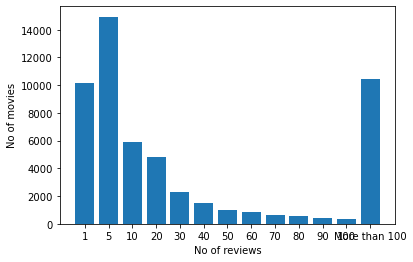

In [ ]:
row=['1','5','10','20','30','40','50','60','70','80','90','100','More than 100']
plt.bar(row,COUNT)
plt.xlabel('No of reviews')
plt.ylabel('No of movies')
print('plot shows that most movies have less than 50 reviews')

In [ ]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed)
58094,193878,Les tribulations d'une caissière (2011),Comedy
58095,193880,Her Name Was Mumu (2016),Drama
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi


In [ ]:
encoded_genres=movies['genres'].str.get_dummies(sep='|')           #One hot encoding for movie Genres.

In [ ]:
encoded_genres

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58093,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58094,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58095,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
58096,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [ ]:
movies=pd.concat([movies,encoded_genres],axis=1)

In [ ]:
movies.drop(['genres'],axis=1,inplace=True)

In [ ]:
movies

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58093,193876,The Great Glinka (1946),1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58094,193878,Les tribulations d'une caissière (2011),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
58095,193880,Her Name Was Mumu (2016),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58096,193882,Flora (2017),0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
encoded_genres=(encoded_genres.apply(sum,axis=0)).sort_values(ascending=False)

In [ ]:
encoded_genres=pd.DataFrame(encoded_genres)
encoded_genres.reset_index(inplace=True)

In [ ]:
encoded_genres.rename(columns={'index':'genres', 0:'no_of_movies'},inplace=True)
encoded_genres

,genres,no_of_movies
0,Drama,24144
1,Comedy,15956
2,Thriller,8216
3,Romance,7412
4,Action,7130
5,Horror,5555
6,Documentary,5118
7,Crime,5105
8,(no genres listed),4266
9,Adventure,4067


### Analysing the no of movies on the basis of genres.

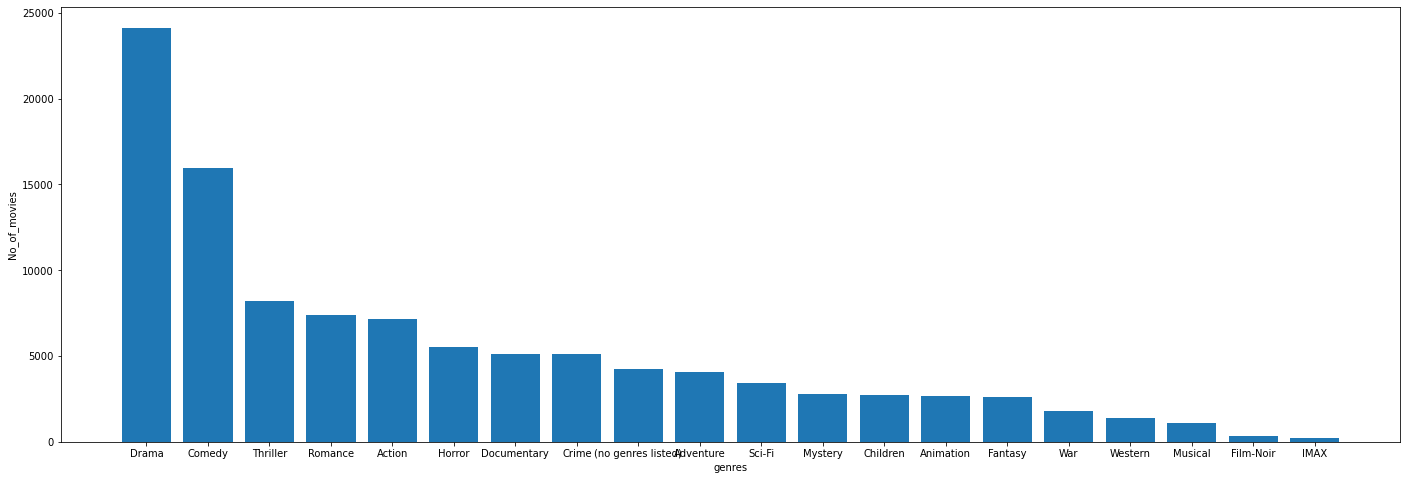

In [ ]:
plt.figure(figsize=(24,8))                                   #19 genres and 1 no genre listed.
plt.bar(encoded_genres.genres,encoded_genres.no_of_movies)
plt.xlabel('genres')
plt.ylabel('No_of_movies')

plt.show()

Above figure shows that drama and comedy movies show dominance in the genre.
Also about 4000 movies have no genres listed.

### No of movies releases by year.

In [ ]:
movies['year']=movies['title'].str.extract(r'\((\d{4})\)$')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


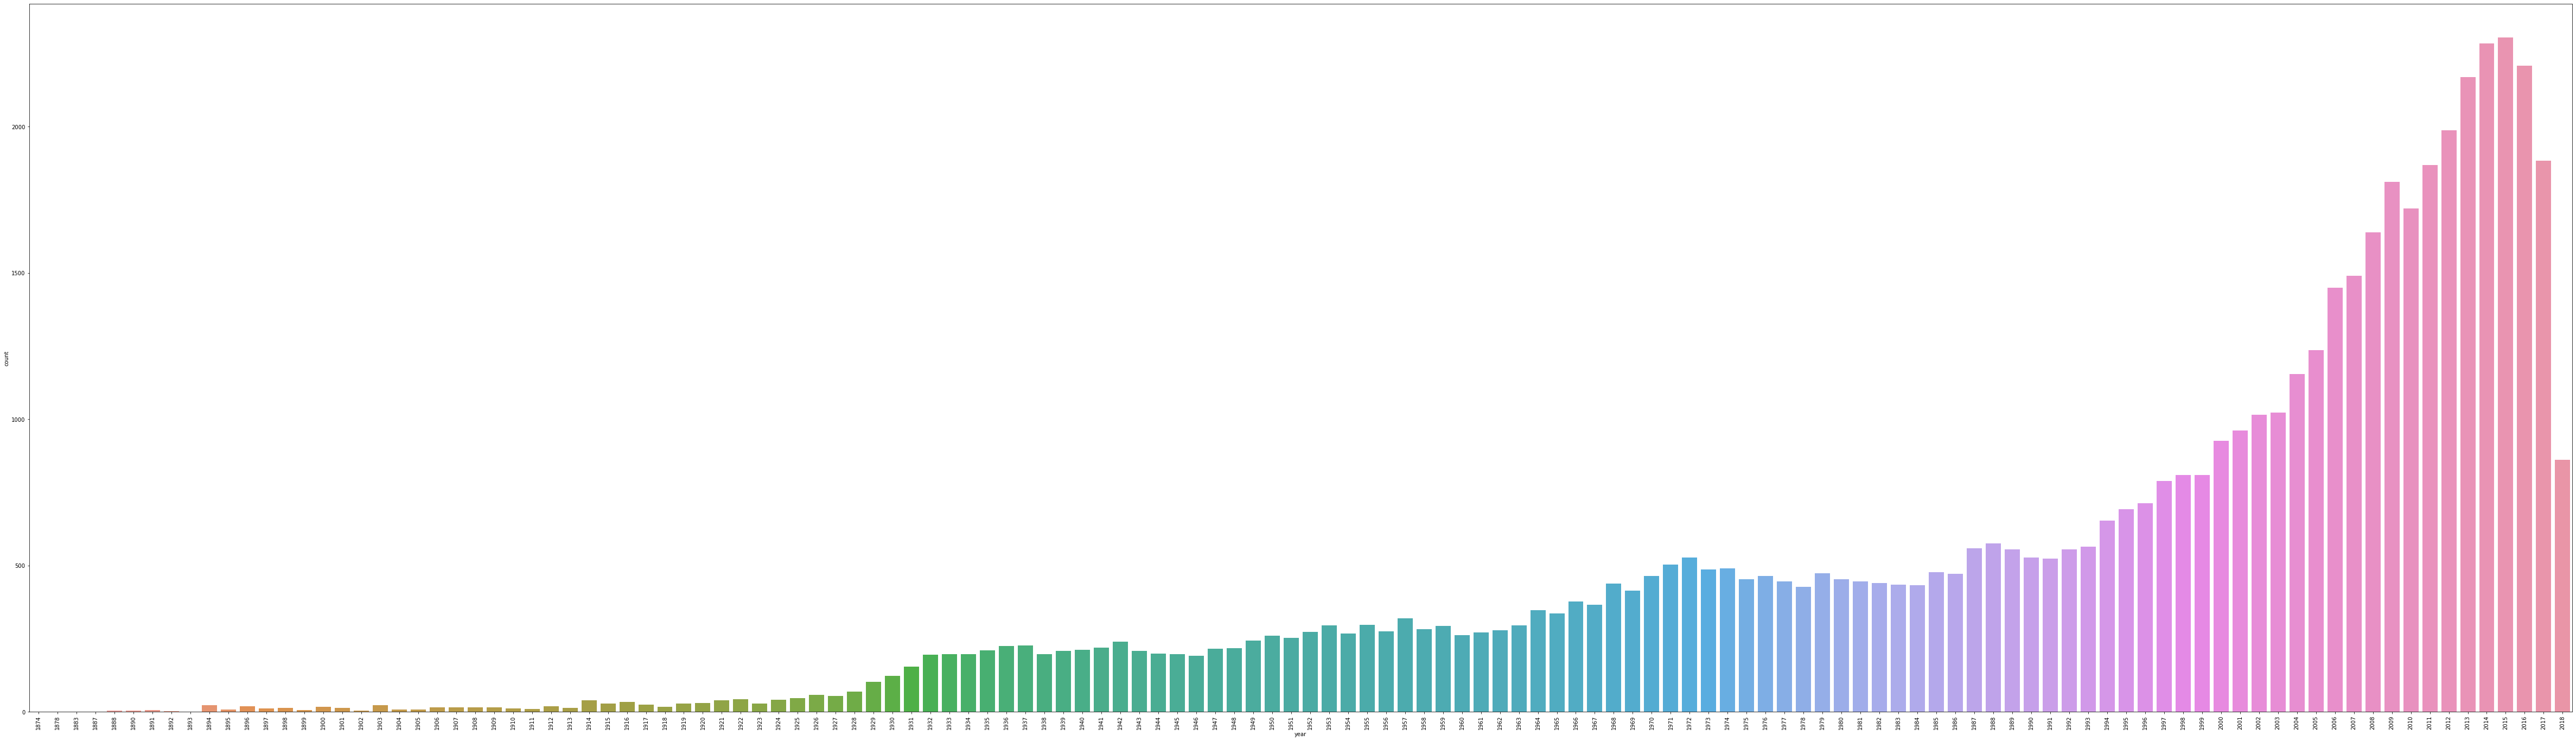

In [ ]:
plt.figure(figsize=(84,24))                                   #data ranges from 1995 to 2018(Sep).
sns.countplot(movies['year'].sort_values())
plt.xticks(rotation=90)
plt.show()

From the above graph we can interpret that from past 3 years no of movies releases have continuously decreased, although we have dataset upto Sept 2018, i.e more movies might get released in 2018.

### Analysing ratings on the basis of genres.

In [ ]:
mean_rating=pd.DataFrame(merged_data.groupby('movieId')['rating'].mean())        #contains mean rating for movies.

In [ ]:
movies_gwr= pd.merge(movies,mean_rating, on='movieId')

In [ ]:
movies_gwr

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year,rating
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1995,3.886649
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1995,3.246583
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1995,3.173981
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1995,2.874540
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1995,3.077291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53884,193876,The Great Glinka (1946),1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1946,3.000000
53885,193878,Les tribulations d'une caissière (2011),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2011,2.000000
53886,193880,Her Name Was Mumu (2016),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016,2.000000
53887,193882,Flora (2017),0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2017,2.000000


In [ ]:
genre_wise_ratings=[]
for i in range(2,22):
    rate=[]
    for j in range(len(movies_gwr['movieId'])):
        if movies_gwr.iloc[j,i]==1:
            rate.append(movies_gwr.iloc[j,23])
    genre_wise_ratings.append(np.mean(rate))

In [ ]:
clm=['(no genres listed)', 'Action', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

In [ ]:
avg_rating_genrewise=pd.concat([pd.DataFrame(clm),pd.DataFrame(genre_wise_ratings)],axis=1)
avg_rating_genrewise.columns=['genre','rating']

In [ ]:
avg_rating_genrewise.sort_values(by=['rating'],ascending=False,inplace=True)

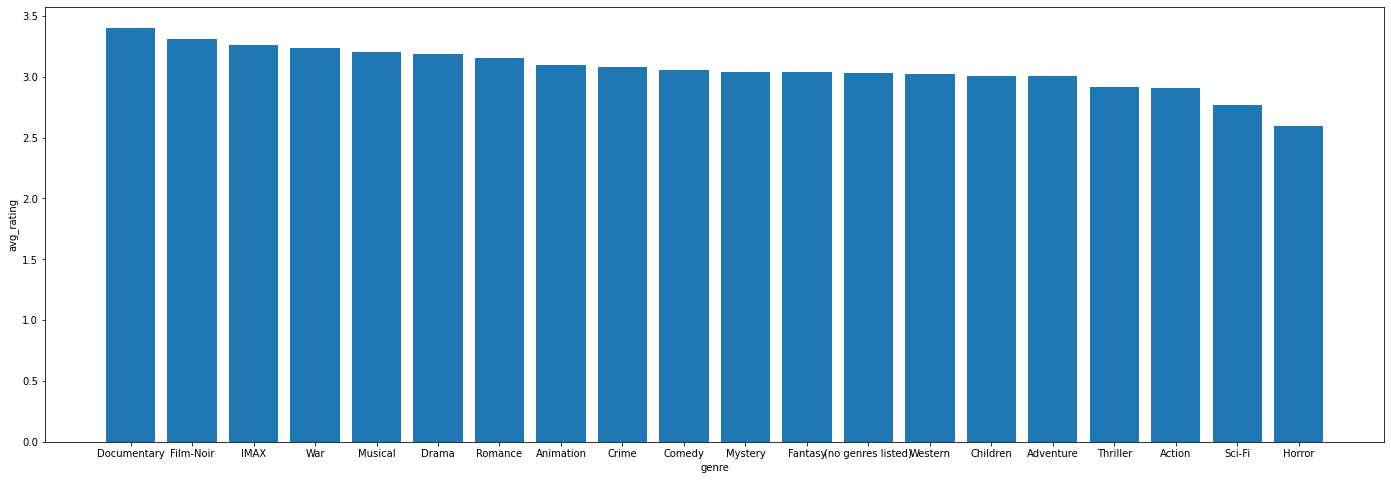

In [ ]:
plt.figure(figsize=(24,8))
plt.bar(avg_rating_genrewise['genre'],avg_rating_genrewise['rating'])
plt.xlabel('genre')
plt.ylabel('avg_rating')
plt.show()

# Approach1- Content Based Filtering

Preprocessing

In [ ]:
scores=pd.merge(scores,gm_tags, on='tagId')

In [ ]:
scores

,movieId,tagId,relevance,tag
0,1,11,0.58700,3d
1,37,11,0.94550,3d
2,1323,11,0.53425,3d
3,1389,11,0.51675,3d
4,1976,11,0.56425,3d
...,...,...,...,...
593230,102058,89,0.50350,author:alan moore
593231,112911,89,1.00000,author:alan moore
593232,168420,89,0.60200,author:alan moore
593233,82095,1099,0.59700,waste of time


In [ ]:
grouped_tags=scores.groupby('movieId').agg(lambda x: " ".join(x))

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


In [ ]:
grouped_tags

,tag
movieId,
1,3d action adventure affectionate animal movie ...
2,action adventure animals based on book catastr...
3,comedy destiny family fun movie funny good gre...
4,feel good movie feel-good friendship original ...
5,chase comedy cute cute! destiny family feel go...
...,...
185435,comedy good great ending original predictable ...
185585,action catastrophe mentor original pg-13 predi...
186587,action based on book catastrophe chase destiny...


In [ ]:
movies_tags['genres']=movies_tags['genres'].apply(lambda x: x.replace('|',' '))

In [ ]:
movies_tags

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed)
58094,193878,Les tribulations d'une caissière (2011),Comedy
58095,193880,Her Name Was Mumu (2016),Drama
58096,193882,Flora (2017),Adventure Drama Horror Sci-Fi


In [ ]:
movies_tags['genres']=movies_tags['genres'].replace({'(no genres listed)':""})

In [ ]:
movies_tags

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
58093,193876,The Great Glinka (1946),
58094,193878,Les tribulations d'une caissière (2011),Comedy
58095,193880,Her Name Was Mumu (2016),Drama
58096,193882,Flora (2017),Adventure Drama Horror Sci-Fi


In [ ]:
non_rated_movies=movies_tags[~movies_tags['movieId'].isin(data['movieId'])]
non_rated_movies

,movieId,title,genres
8403,25817,Break of Hearts (1935),Drama Romance
8800,26361,Baby Blue Marine (1976),Drama
9221,27153,Can't Be Heaven (Forever Together) (2000),Children Comedy Drama Romance
9336,27433,Bark! (2002),Comedy Drama
9809,31945,Always a Bridesmaid (2000),Documentary
...,...,...,...
57522,192399,Under Wraps (1997),Children Comedy Horror
57718,192933,Rosie (2018),Drama
57773,193109,Ach śpij kochanie (2017),Crime Thriller
57854,193321,Pledges (2018),Comedy Horror


In [ ]:
non_rated_movies[~non_rated_movies['movieId'].isin(scores['movieId'])]

,movieId,title,genres
8403,25817,Break of Hearts (1935),Drama Romance
8800,26361,Baby Blue Marine (1976),Drama
9221,27153,Can't Be Heaven (Forever Together) (2000),Children Comedy Drama Romance
9336,27433,Bark! (2002),Comedy Drama
9809,31945,Always a Bridesmaid (2000),Documentary
...,...,...,...
57522,192399,Under Wraps (1997),Children Comedy Horror
57718,192933,Rosie (2018),Drama
57773,193109,Ach śpij kochanie (2017),Crime Thriller
57854,193321,Pledges (2018),Comedy Horror


In [ ]:
non_rated_movies[~non_rated_movies['movieId'].isin(tags['movieId'])]                     #this tells that all non rated movies have tags

,movieId,title,genres


In [ ]:
grouped_tags2=pd.DataFrame(tags.groupby('movieId')['tag'].agg(lambda x: " ".join(x.astype(str))))

In [ ]:
grouped_tags2

,tag
movieId,
1,animated buddy movie Cartoon cgi comedy comput...
2,fantasy adapted from:book animals bad cgi base...
3,moldy old Ann Margaret Burgess Meredith Daryl ...
4,characters girl movie characters chick flick b...
5,steve martin steve martin pregnancy remake agi...
...,...
193761,concert hostage kidnapping opera singer rebel ...
193811,doppelganger Julie Delpy
193837,aliens anime cat space marines virus


cbf- generating cbf dataset that contains all the data based on content based filtering.

In [ ]:
cbf=pd.merge(movies_tags,grouped_tags,how='left',on='movieId')

In [ ]:
cbf=pd.merge(cbf,grouped_tags2,how='left',on='movieId')

In [ ]:
cbf

,movieId,title,genres,tag_x,tag_y
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,3d action adventure affectionate animal movie ...,animated buddy movie Cartoon cgi comedy comput...
1,2,Jumanji (1995),Adventure Children Fantasy,action adventure animals based on book catastr...,fantasy adapted from:book animals bad cgi base...
2,3,Grumpier Old Men (1995),Comedy Romance,comedy destiny family fun movie funny good gre...,moldy old Ann Margaret Burgess Meredith Daryl ...
3,4,Waiting to Exhale (1995),Comedy Drama Romance,feel good movie feel-good friendship original ...,characters girl movie characters chick flick b...
4,5,Father of the Bride Part II (1995),Comedy,chase comedy cute cute! destiny family feel go...,steve martin steve martin pregnancy remake agi...
...,...,...,...,...,...
58093,193876,The Great Glinka (1946),,NaN,NaN
58094,193878,Les tribulations d'une caissière (2011),Comedy,NaN,NaN
58095,193880,Her Name Was Mumu (2016),Drama,NaN,NaN
58096,193882,Flora (2017),Adventure Drama Horror Sci-Fi,NaN,NaN


In [ ]:
cbf['tag_x'].fillna("", inplace=True)

In [ ]:
cbf['tag_y'].fillna("", inplace=True)

In [ ]:
cbf

,movieId,title,genres,tag_x,tag_y
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,3d action adventure affectionate animal movie ...,animated buddy movie Cartoon cgi comedy comput...
1,2,Jumanji (1995),Adventure Children Fantasy,action adventure animals based on book catastr...,fantasy adapted from:book animals bad cgi base...
2,3,Grumpier Old Men (1995),Comedy Romance,comedy destiny family fun movie funny good gre...,moldy old Ann Margaret Burgess Meredith Daryl ...
3,4,Waiting to Exhale (1995),Comedy Drama Romance,feel good movie feel-good friendship original ...,characters girl movie characters chick flick b...
4,5,Father of the Bride Part II (1995),Comedy,chase comedy cute cute! destiny family feel go...,steve martin steve martin pregnancy remake agi...
...,...,...,...,...,...
58093,193876,The Great Glinka (1946),,,
58094,193878,Les tribulations d'une caissière (2011),Comedy,,
58095,193880,Her Name Was Mumu (2016),Drama,,
58096,193882,Flora (2017),Adventure Drama Horror Sci-Fi,,


In [ ]:
cbf['genres']=cbf['genres']+" "+cbf['tag_x']+" "+cbf['tag_y']

In [ ]:
cbf.drop(columns=['tag_x','tag_y'],axis=1,inplace=True)

In [ ]:
cbf.rename({'genres':'tags'}, axis=1, inplace=True)

In [ ]:
cbf['tags']=cbf['tags'].str.lower()

In [ ]:
cbf

,movieId,title,tags
0,1,Toy Story (1995),adventure animation children comedy fantasy 3d...
1,2,Jumanji (1995),adventure children fantasy action adventure an...
2,3,Grumpier Old Men (1995),comedy romance comedy destiny family fun movie...
3,4,Waiting to Exhale (1995),comedy drama romance feel good movie feel-good...
4,5,Father of the Bride Part II (1995),comedy chase comedy cute cute! destiny family ...
...,...,...,...
58093,193876,The Great Glinka (1946),
58094,193878,Les tribulations d'une caissière (2011),comedy
58095,193880,Her Name Was Mumu (2016),drama
58096,193882,Flora (2017),adventure drama horror sci-fi


In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/rishabh/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/rishabh/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/rishabh/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/rishabh/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/rishabh/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading pa

[nltk_data]    |   Package omw is already up-to-date!
[nltk_data]    | Downloading package omw-1.4 to
[nltk_data]    |     /Users/rishabh/nltk_data...
[nltk_data]    |   Package omw-1.4 is already up-to-date!
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     /Users/rishabh/nltk_data...
[nltk_data]    |   Package opinion_lexicon is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     /Users/rishabh/nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package paradigms to
[nltk_data]    |     /Users/rishabh/nltk_data...
[nltk_data]    |   Package paradigms is already up-to-date!
[nltk_data]    | Downloading package pe08 to
[nltk_data]    |     /Users/rishabh/nltk_data...
[nltk_data]    |   Package pe08 is already up-to-date!
[nltk_data]    | Downloading package perluniprops to
[nltk_data]    |     /Users/rishabh/nltk_data...
[nltk_data]    |   Package perluniprops i

[nltk_data]    |   Package wordnet_ic is already up-to-date!
[nltk_data]    | Downloading package words to
[nltk_data]    |     /Users/rishabh/nltk_data...
[nltk_data]    |   Package words is already up-to-date!
[nltk_data]    | Downloading package ycoe to
[nltk_data]    |     /Users/rishabh/nltk_data...
[nltk_data]    |   Package ycoe is already up-to-date!
[nltk_data]    | 
[nltk_data]  Done downloading collection all


True

In [ ]:
import nltk

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def preprocess_text(tags):
    lem = WordNetLemmatizer()
    words=[w for w in word_tokenize(tags) if (w not in stop_words)]
    words=[lem.lemmatize(w) for w in words]
    return words

In [ ]:
cbf['tags'] = cbf['tags'].apply(preprocess_text)

In [ ]:
cbf['tags']=cbf['tags'].apply(lambda x:' '.join(x))

In [ ]:
cbf

,movieId,title,tags
0,1,Toy Story (1995),adventure animation child comedy fantasy 3d ac...
1,2,Jumanji (1995),adventure child fantasy action adventure anima...
2,3,Grumpier Old Men (1995),comedy romance comedy destiny family fun movie...
3,4,Waiting to Exhale (1995),comedy drama romance feel good movie feel-good...
4,5,Father of the Bride Part II (1995),comedy chase comedy cute cute ! destiny family...
...,...,...,...
58093,193876,The Great Glinka (1946),
58094,193878,Les tribulations d'une caissière (2011),comedy
58095,193880,Her Name Was Mumu (2016),drama
58096,193882,Flora (2017),adventure drama horror sci-fi


In [ ]:
req_data=data.drop(columns=['title','genres'])

In [ ]:
req_data

,movieId,no_of_reviews,rating
0,318,97999,4.424188
1,356,97040,4.056585
2,296,92406,4.173971
3,593,87899,4.151412
4,2571,84545,4.149695
...,...,...,...
53884,165077,1,4.000000
53885,172453,1,2.500000
53886,192975,1,2.500000
53887,167092,1,3.500000


In [ ]:
req_data['rating'].mean()              #to check mean rating for all the movies.

3.068592725397307

In [ ]:
cbf.fillna("",inplace=True)

In [ ]:
cbf.to_csv('cbf_matadata.csv')

In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#tvf= TfidfVectorizer(min_df=3, max_features=None,
                     strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
                     ngram_range=(1,2),
                     stop_words='english')

In [ ]:
#tvf_matrix= tvf.fit_transform(cbf['tags'])

In [ ]:
#tvf_matrix.shape

(58098, 87501)

In [ ]:
#from sklearn.metrics.pairwise import linear_kernel       ###
#cosine_sim = linear_kernel(tvf_matrix, tvf_matrix)

In [ ]:
#2 min_df=10
from sklearn.feature_extraction.text import TfidfVectorizer
tvf2= TfidfVectorizer(min_df=10, max_features=None,
                     strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
                     ngram_range=(1,2),
                     stop_words='english')

In [ ]:
tvf_matrix2= tvf2.fit_transform(cbf['tags'])

In [ ]:
tvf_matrix2.shape

(58098, 23976)

In [ ]:
pd.DataFrame(tvf_matrix2[0])

,0
0,"(0, 8337)\t0.006526428555132971\n (0, 7383)..."


In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tvf_matrix2, tvf_matrix2)

In [ ]:
#print tvf matrix- Tvf matrix for reference.

In [ ]:
#3
#from sklearn.feature_extraction.text import TfidfVectorizer
#tvf3= TfidfVectorizer(min_df=5, max_features=None,
#                    strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
#                    ngram_range=(1,2),
#                    stop_words='english')

In [ ]:
#tvf_matrix3= tvf3.fit_transform(cbf['tags'])

In [ ]:
#tvf_matrix3.shape

In [ ]:
cbf=pd.merge(cbf,req_data,on='movieId',how='left')

In [ ]:
cbf.isnull().sum()

movieId             0
title               0
tags                0
no_of_reviews    4209
rating           4209
dtype: int64

In [ ]:
cbf.fillna(0, inplace=True)              # for non rated movies.

In [ ]:
cosine_sim[20000]

array([0.00517027, 0.0048882 , 0.        , ..., 0.15448375, 0.31280115,
       0.12881901])

In [ ]:
sim_scores = list(enumerate(cosine_sim[12888]))      #to add a counter.
sim_scores

[(0, 0.00540206427834143),
 (1, 0.0056122668297860796),
 (2, 0.016087918242743447),
 (3, 0.03590545921906158),
 (4, 0.005688881799213374),
 (5, 0.0023636570485017117),
 (6, 0.03762625359238789),
 (7, 0.024451986412213363),
 (8, 0.003685713233291352),
 (9, 0.001074548528231073),
 (10, 0.03760018378482411),
 (11, 0.0038303025149497762),
 (12, 0.08285086340948018),
 (13, 0.1203988732367303),
 (14, 0.0018224168152847977),
 (15, 0.014498469785301003),
 (16, 0.01961685846419071),
 (17, 0.011996276404138893),
 (18, 0.007749753326370323),
 (19, 0.004359256183958993),
 (20, 0.010318706601489903),
 (21, 0.00043841230224142455),
 (22, 0.0),
 (23, 0.015100286509890433),
 (24, 0.03554205420232262),
 (25, 0.013456434117666541),
 (26, 0.0012046854811464276),
 (27, 0.012521040124105844),
 (28, 0.0015948333249262863),
 (29, 0.011357942310317707),
 (30, 0.023446270387348294),
 (31, 0.0014886333471593922),
 (32, 0.009555327454985335),
 (33, 0.016872638946950184),
 (34, 0.04026600499574063),
 (35, 0.10131

In [ ]:
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores

[(12888, 0.9999999999999999),
 (36394, 0.4532702112781447),
 (38602, 0.39664941117591596),
 (51751, 0.3952643306350689),
 (41036, 0.39496968681202616),
 (44279, 0.39244485810155033),
 (47810, 0.38866637807526017),
 (49410, 0.3698154258831001),
 (46970, 0.36904566511902875),
 (44800, 0.35851478926331026),
 (21045, 0.3527073034774222),
 (55887, 0.3527073034774222),
 (45771, 0.3490503380661981),
 (18452, 0.3422486284870804),
 (38716, 0.337965805205392),
 (5395, 0.33563205195737233),
 (7990, 0.3184523174683914),
 (18460, 0.3184523174683914),
 (19248, 0.3184523174683914),
 (20973, 0.3184523174683914),
 (22425, 0.3184523174683914),
 (23554, 0.3184523174683914),
 (24695, 0.3184523174683914),
 (28231, 0.3184523174683914),
 (33536, 0.3184523174683914),
 (51028, 0.3184523174683914),
 (52023, 0.3184523174683914),
 (54904, 0.3184523174683914),
 (57571, 0.3184523174683914),
 (58020, 0.3184523174683914),
 (31818, 0.3141997877768486),
 (50711, 0.3086852336816145),
 (19746, 0.303688503271489),
 (20385

In [ ]:
def get_recommendations(title):                                               #recommendations using CBF2 words=10
    index=cbf.index[cbf['title']==title]
    sim_scores = list(enumerate(cosine_sim[index[0]]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:50]
    movie_index = [i[0] for i in sim_scores]
    good_movies=cbf.iloc[movie_index,:]
    res=good_movies[(good_movies['no_of_reviews']>10)& (good_movies['rating']>2.5)]
    return res.iloc[:10,[0,1,4]]

In [ ]:
get_recommendations('Iron Man 3 (2013)')

,movieId,title,rating
12666,59315,Iron Man (2008),3.848194
15271,77561,Iron Man 2 (2010),3.502211
17997,89745,"Avengers, The (2012)",3.799011
27559,122912,Avengers: Infinity War - Part I (2018),3.956709
6783,6892,"Singing Detective, The (2003)",2.783333
7394,7618,Chaplin (1992),3.613725
3378,3466,Heart and Souls (1993),3.458575
14658,73017,Sherlock Holmes (2009),3.760083
2362,2446,In Dreams (1999),2.696947
10477,38061,Kiss Kiss Bang Bang (2005),3.847829


In [ ]:
get_recommendations('Avengers, The (2012)')

,movieId,title,rating
15271,77561,Iron Man 2 (2010),3.502211
12666,59315,Iron Man (2008),3.848194
21101,102125,Iron Man 3 (2013),3.536996
27559,122912,Avengers: Infinity War - Part I (2018),3.956709
27550,122892,Avengers: Age of Ultron (2015),3.588187
23452,110102,Captain America: The Winter Soldier (2014),3.709023
27562,122920,Captain America: Civil War (2016),3.723544
17615,88140,Captain America: The First Avenger (2011),3.521785
22251,106072,Thor: The Dark World (2013),3.347463
17138,86332,Thor (2011),3.385619


In [ ]:
get_recommendations('Jumanji (1995)')

,movieId,title,rating
1643,1702,Flubber (1997),2.584252
26646,120805,Robin Williams: Weapons of Self Destruction (2...,3.864865
29782,128846,An Evening with Robin Williams (1982),3.723684
496,500,Mrs. Doubtfire (1993),3.392683
752,765,Jack (1996),3.050608
8256,8939,"Final Cut, The (2004)",3.194821
14301,71429,World's Greatest Dad (2009),3.444660
5432,5528,One Hour Photo (2002),3.301482
3360,3448,"Good Morning, Vietnam (1987)",3.666497
2169,2253,Toys (1992),2.750057


In [ ]:
get_recommendations('Deadpool (2016)')

,movieId,title,rating
55569,187593,Deadpool 2 (2018),3.838947
35052,141428,Guidance (2014),3.437500
27564,122924,X-Men: Apocalypse (2016),3.299556
17083,86066,Playing the Victim (Izobrazhaya zhertvu) (2006),3.662162
25496,116897,Wild Tales (2014),4.097023
21579,103772,"Wolverine, The (2013)",3.235615
17385,87232,X-Men: First Class (2011),3.757947
3703,3793,X-Men (2000),3.564169
10910,44195,Thank You for Smoking (2006),3.823249
12366,56869,Drained (O cheiro do Ralo) (2006),3.734043


In [ ]:
get_recommendations('Cinderella (1950)')

,movieId,title,rating
588,594,Snow White and the Seven Dwarfs (1937),3.573763
2013,2096,Sleeping Beauty (1959),3.562051
589,595,Beauty and the Beast (1991),3.679634
30231,130073,Cinderella (2015),3.357018
16276,81847,Tangled (2010),3.751851
590,596,Pinocchio (1940),3.446094
2791,2876,Thumbelina (1994),2.795972
582,588,Aladdin (1992),3.691753
14595,72737,"Princess and the Frog, The (2009)",3.499776
3685,3775,Make Mine Music (1946),3.164234


In [ ]:
get_recommendations('Toy Story (1995)')

,movieId,title,rating
3028,3114,Toy Story 2 (1999),3.809977
2271,2355,"Bug's Life, A (1998)",3.575722
15471,78499,Toy Story 3 (2010),3.870090
4791,4886,"Monsters, Inc. (2001)",3.853349
41760,157296,Finding Dory (2016),3.656261
6272,6377,Finding Nemo (2003),3.845176
13812,68954,Up (2009),3.973415
8278,8961,"Incredibles, The (2004)",3.855338
5122,5218,Ice Age (2002),3.553445
11638,50872,Ratatouille (2007),3.816442


In [ ]:
recommend=pd.DataFrame()
for i in cbf['title']:
    a=get_recommendations(i)
    a['movie']=i
    recommend=recommend.append(a)

In [ ]:
cbf_recommended1=recommend.copy()                #This just to keep a copy of record(computation time.)

In [ ]:
cbf_recommended1.reset_index(inplace=True)

In [ ]:
cbf_recommended1.iloc[:,[3,0,1,2]].to_excel('recommend_cbf.xlsx')

## Forming doc profile

Above we are recommending movies on the basis of similarity b/w movies. Users are not involved.
Given below- a doc profile which is user profile is generated, now similarity b/w user and item profile will
generated. Here, doc profile is the weighted average viz:-
u = Σrujх Dj / Σruj

In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264
...,...,...,...,...
27753439,283228,8542,4.5,1379882795
27753440,283228,8712,4.5,1379882751
27753441,283228,34405,4.5,1379882889
27753442,283228,44761,4.5,1354159524


In [ ]:
user_mvId=pd.DataFrame(ratings.groupby('userId')['movieId'].apply(list))

In [ ]:
user_rat=pd.DataFrame(ratings.groupby('userId')['rating'].apply(list))

In [ ]:
users=pd.merge(user_mvId,user_rat, on='userId',how='inner')

In [ ]:
users.reset_index(inplace=True)

In [ ]:
copy=users.copy()

In [ ]:
users

,userId,movieId,rating
0,1,"[307, 481, 1091, 1257, 1449, 1590, 1591, 2134,...","[3.5, 3.5, 1.5, 4.5, 4.5, 2.5, 1.5, 4.5, 4.0, ..."
1,2,"[170, 849, 1186, 1235, 1244, 1296, 1663, 1962,...","[3.5, 3.5, 3.5, 3.0, 3.0, 4.5, 3.0, 4.0, 3.5, ..."
2,3,"[640, 828, 960, 1221, 1321, 1645, 1825, 1985, ...","[3.0, 4.0, 3.0, 4.0, 4.0, 4.0, 3.0, 2.0, 3.0, ..."
3,4,"[1, 2, 5, 6, 10, 11, 16, 19, 20, 23, 25, 31, 3...","[4.0, 4.0, 2.0, 4.5, 4.0, 3.5, 4.0, 2.0, 2.5, ..."
4,5,"[47, 50, 293, 296, 318, 527, 728, 778, 858, 11...","[4.0, 5.0, 3.5, 5.0, 5.0, 4.5, 3.0, 5.0, 4.5, ..."
...,...,...,...
283223,283224,"[3, 10, 14, 19, 22, 32, 45, 46, 60, 62, 74, 11...","[4.0, 3.0, 3.0, 1.0, 3.0, 3.0, 3.0, 2.0, 3.0, ..."
283224,283225,"[112, 151, 163, 172, 370, 784, 1234, 1252, 128...","[2.5, 2.5, 3.5, 2.0, 3.0, 3.0, 4.0, 4.0, 3.0, ..."
283225,283226,"[65, 231, 288, 344, 420, 502, 1373, 2421, 2642...","[1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0, 2.0, 2.0, ..."
283226,283227,"[216, 362, 531, 616, 1271, 1345, 1405, 1513, 2...","[5.0, 5.0, 3.5, 4.0, 4.0, 3.0, 2.5, 2.5, 3.0, ..."


In [ ]:
test=users.iloc[0:5,:]

In [ ]:
cbf1=cbf.copy()
cbf1=cbf1.merge(movies1[['movieId','genres']], how='inner',on='movieId')

In [ ]:
from scipy import sparse

In [ ]:
#x,i= movieId
#y,j= rating
def doc_profile(x,y):
    doc_profile= sparse.csr_matrix((1,tvf_matrix2.shape[1]))
    rating=0
    for i,j in zip(x,y):
        index=cbf.index[cbf['movieId']==i]
        doc_profile=doc_profile+j*tvf_matrix2[index[0]]
        rating+=j
    doc_profile=doc_profile/ rating
    return doc_profile

In [ ]:
def user_recommendations_cbf(user_id):
    index=users.index[users['userId']==user_id]
    user_profile=doc_profile(users.loc[index[0],'movieId'],users.loc[index[0],'rating'])
    cosine_sim = linear_kernel(user_profile,tvf_matrix2)
    sim_scores = list(enumerate(cosine_sim[0]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:20]
    movie_index = [i[0] for i in sim_scores]
    good_movies=cbf1.iloc[movie_index,:]
    #extracting already watched movies by the given user
    movieId_watched=ratings[ratings['userId']==user_id]['movieId'].unique()
    #to remove movies previously watched by user.
    good_movies=good_movies[~good_movies['movieId'].isin(movieId_watched)]
    res=good_movies[(good_movies['no_of_reviews']>10)& (good_movies['rating']>2.5)]
    return good_movies.iloc[:10,[0,1,4,5]]

In [ ]:
user_recommendations_cbf(655)

,movieId,title,rating,genres
3703,3793,X-Men (2000),3.564169,Action|Adventure|Sci-Fi
6235,6333,X2: X-Men United (2003),3.613297,Action|Adventure|Sci-Fi|Thriller
12894,60684,Watchmen (2009),3.709251,Action|Drama|Mystery|Sci-Fi|Thriller|IMAX
1963,2046,Flight of the Navigator (1986),3.417106,Adventure|Children|Sci-Fi
2557,2641,Superman II (1980),3.095659,Action|Sci-Fi
12893,60674,Stargate: Continuum (2008),3.707358,Sci-Fi
2575,2660,"Thing from Another World, The (1951)",3.667945,Horror|Sci-Fi
44809,164179,Arrival (2016),4.019926,Sci-Fi
2556,2640,Superman (1978),3.379573,Action|Adventure|Sci-Fi
14227,71129,Green Lantern: First Flight (2009),3.313008,Action|Adventure|Animation|Fantasy|Sci-Fi


In [ ]:
user_recommendations_cbf(234)

,movieId,title,rating,genres
2061,2144,Sixteen Candles (1984),3.618039,Comedy|Romance
1885,1968,"Breakfast Club, The (1985)",3.827884,Comedy|Drama
2621,2706,American Pie (1999),3.296788,Comedy|Romance
29048,126548,The DUFF (2015),3.358292,Comedy
3529,3619,"Hollywood Knights, The (1980)",3.108108,Comedy
45762,166291,A Silent Voice (2016),4.022124,Animation|Drama|Romance
11209,47122,John Tucker Must Die (2006),3.119340,Comedy|Romance
1812,1895,Can't Hardly Wait (1998),3.201237,Comedy|Drama|Romance
33698,138230,Staten Island Summer (2015),3.031746,Comedy
4111,4204,Losin' It (1983),2.251572,Comedy


In [ ]:
user_recommendations_cbf(2022)

,movieId,title,rating,genres
1326,1356,Star Trek: First Contact (1996),3.663769,Action|Adventure|Sci-Fi|Thriller
12893,60674,Stargate: Continuum (2008),3.707358,Sci-Fi
1345,1376,Star Trek IV: The Voyage Home (1986),3.462051,Adventure|Comedy|Sci-Fi
1343,1374,Star Trek II: The Wrath of Khan (1982),3.685003,Action|Adventure|Sci-Fi|Thriller
1341,1372,Star Trek VI: The Undiscovered Country (1991),3.299276,Action|Mystery|Sci-Fi
5846,5944,Star Trek: Nemesis (2002),3.140672,Action|Drama|Sci-Fi|Thriller
257,260,Star Wars: Episode IV - A New Hope (1977),4.120455,Action|Adventure|Sci-Fi
32583,135569,Star Trek Beyond (2016),3.576659,Action|Adventure|Sci-Fi
1963,2046,Flight of the Navigator (1986),3.417106,Adventure|Children|Sci-Fi


In [ ]:
user_recommendations_cbf(4567)

,movieId,title,rating,genres
20738,100617,Patton Oswalt: No Reason to Complain (2004),3.820312,Comedy
23413,109968,Why Don't You Play In Hell? (Jigoku de naze wa...,3.833333,Action|Drama
34372,139863,Ghost in the Shell Arise - Border 4: Ghost Sta...,3.778481,Action|Animation|Sci-Fi
19798,97194,"Thing: Terror Takes Shape, The (1998)",3.879747,Documentary
14469,72178,Welcome to Dongmakgol (2005),3.725806,Comedy|Drama|War
48702,172591,The Godfather Trilogy: 1972-1990 (1992),4.339667,(no genres listed)
17723,88593,"Yellow Sea, The (a.k.a. The Murderer) (Hwangha...",3.638889,Crime|Drama|Thriller
30788,131433,Confession of Murder (2012),3.564815,Action|Thriller
21078,102062,"Band Called Death, A (2012)",3.603448,Documentary
17183,86504,Voices from the List (2004),4.124444,Documentary


# Approach2- Collaborative Filtering Model_SVD

In [ ]:
pip install scikit-surprise

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import surprise
from surprise import Reader,Dataset,SVD
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

In [ ]:
from surprise.model_selection import GridSearchCV

In [ ]:
reader = Reader(line_format='user item rating timestamp', sep='\t')

reader = Reader(rating_scale=(0.5, 5.0))

ratings_data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [ ]:
iid=movies1['movieId'].unique()                      #for collecting unique movieIds in an array

SVD- The Singular Value Decomposition (SVD), a method from linear algebra that has been generally used as a dimensionality reduction technique in machine learning.Its a matrix factorisation technique according to which
each matrix can be decomposed into a product of 3 matrices.

In [ ]:
algo = SVD(n_factors=20, n_epochs=10,lr_all= 0.008, reg_all= 0.08,verbose=True)
cross_validate(algo, ratings_data, measures=["RMSE", "MAE"], cv=5, verbose=True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Evaluating RMSE, MAE of algorithm SVD on 5 split(s

{'test_rmse': array([0.86238878, 0.86205412, 0.86193636, 0.86188451, 0.86204959]),
 'test_mae': array([0.65785636, 0.65768496, 0.65753368, 0.65751245, 0.65758223]),
 'fit_time': (181.31205415725708,
  413.7502660751343,
  543.7953009605408,
  590.5216829776764,
  644.9964780807495),
 'test_time': (310.54891896247864,
  375.08159494400024,
  304.60807394981384,
  3225.2334830760956,
  416.42166113853455)}

In [ ]:
import pickle

In [ ]:
#with open('svd_new.pkl','wb') as file:
#    pickle.dump(algo,file)

In [ ]:
with open('svd_new.pkl','rb') as file:
    algo=pickle.load(file)

In [ ]:
def recommendations(user,n):
    top_n=[]                            #list containing top n users.
    uid=user
    no_of_movies=n
    for i in iid:
        pred = algo.predict(uid, i, r_ui=None)
        top_n.append(pred)
    #Sorting movies based on estimated ratings.
    recommend_movies=pd.DataFrame(top_n).sort_values(by='est', ascending=False)
    #extracting already watched movies by the given user
    movieId_watched=ratings[ratings['userId']==uid]['movieId'].unique()
    #to remove movies previously watched by user.
    recommend_movies=recommend_movies[~recommend_movies['iid'].isin(movieId_watched)]
    #to add movie title to the recommended movie dataset.
    recommend_movies=pd.merge(movies1,recommend_movies,how='right',left_on='movieId',right_on='iid',)
    return recommend_movies.iloc[:no_of_movies,[0,1,2,6]]

In [ ]:
recommendations(234,10)

,movieId,title,genres,est
0,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.658270
1,171011,Planet Earth II (2016),Documentary,4.645329
2,171495,Cosmos,(no genres listed),4.632150
3,159817,Planet Earth (2006),Documentary,4.595591
4,858,"Godfather, The (1972)",Crime|Drama,4.557809
5,2858,American Beauty (1999),Drama|Romance,4.553411
6,170705,Band of Brothers (2001),Action|Drama|War,4.545003
7,109487,Interstellar (2014),Sci-Fi|IMAX,4.537449
8,5618,Spirited Away (Sen to Chihiro no kamikakushi) ...,Adventure|Animation|Fantasy,4.534872
9,2324,Life Is Beautiful (La Vita è bella) (1997),Comedy|Drama|Romance|War,4.525932


## Hypertuning parameters using small dataset.

Idea is to hypertune the parameters taking a small- shuffeled dataset.
Failed as hypertuned parameters when applied on complete dataset, RMSE was quite high.

In [ ]:
#Shufflijng the ratings before reducing the dataset.
ratings_shuffled=ratings.sample(frac=1)                               #frac= fraction of axis item to return

In [ ]:
ratings_shuffled=ratings_shuffled.iloc[:1000000,:]

In [ ]:
reader = Reader(line_format='user item rating timestamp', sep='\t')

reader = Reader(rating_scale=(0.5, 5.0))

ratings_gridcv = Dataset.load_from_df(ratings_shuffled[['userId', 'movieId', 'rating']], reader)

In [ ]:
param_grid = {'n_factors': [5,10,15,20], 'n_epochs': [10,15,20], 'lr_all': [0.003, 0.005, 0.008],
              'reg_all': [0.02,0.08, 0.1]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)
gs.fit(ratings_gridcv)
algo = gs.best_estimator['rmse']
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.9149519692209692
{'n_factors': 5, 'n_epochs': 20, 'lr_all': 0.008, 'reg_all': 0.08}


## SVD : parameters_tuning

In [ ]:
algo1= SVD(n_factors=25, n_epochs=15,verbose=True)
cross_validate(algo1, ratings_data, measures=["RMSE", "MAE"], cv=5, verbose=True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch

{'test_rmse': array([0.80772533, 0.8083852 , 0.80761435, 0.80794788, 0.8074742 ]),
 'test_mae': array([0.61185338, 0.61210424, 0.61149478, 0.61184381, 0.61132371]),
 'fit_time': (765.5929248332977,
  176.78492283821106,
  116.31699109077454,
  155.89856696128845,
  173.76577281951904),
 'test_time': (576.5107519626617,
  113.28361892700195,
  163.1077160835266,
  176.9962339401245,
  157.20495295524597)}

In [ ]:
#import pickle
#with open('svd_lf_25','wb') as file:
#    pickle.dump(algo1,file)

In [ ]:
import pickle
with open('svd_lf_25','rb') as file:
    algo1=pickle.load(file)

In [ ]:
def recommendations(user,n):
    top_n=[]                            #list containing top n users.
    uid=user
    no_of_movies=n
    for i in iid:
        pred = algo1.predict(uid, i, r_ui=None)
        top_n.append(pred)
    #Sorting movies based on estimated ratings.
    recommend_movies=pd.DataFrame(top_n).sort_values(by='est', ascending=False)
    #extracting already watched movies by the given user
    movieId_watched=ratings[ratings['userId']==uid]['movieId'].unique()
    #to remove movies previously watched by user.
    recommend_movies=recommend_movies[~recommend_movies['iid'].isin(movieId_watched)]
    #to add movie title to the recommended movie dataset.
    recommend_movies=pd.merge(movies1,recommend_movies,how='right',left_on='movieId',right_on='iid',)
    return recommend_movies.iloc[:no_of_movies,[0,1,2,6]]

In [ ]:
recommendations(234,10)

,movieId,title,genres,est
0,159817,Planet Earth (2006),Documentary,4.552166
1,171011,Planet Earth II (2016),Documentary,4.491122
2,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.476881
3,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,4.472219
4,171495,Cosmos,(no genres listed),4.450178
5,185927,Wild Wild Country (2018),Documentary,4.432057
6,170705,Band of Brothers (2001),Action|Drama|War,4.424776
7,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,4.414061
8,858,"Godfather, The (1972)",Crime|Drama,4.398232
9,172591,The Godfather Trilogy: 1972-1990 (1992),(no genres listed),4.389427


## SVD: Using cross_validation for Hyperparameter tuning

In [ ]:
#Parameters tuning

In [ ]:
param_grid = {'n_factors': [30,40,50], 'n_epochs': [15]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5,joblib_verbose=1)
gs.fit(ratings_data)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 165.4min finished


In [ ]:
algo2 = gs.best_estimator['rmse']
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.8042740790595255
{'n_factors': 50, 'n_epochs': 15}


In [ ]:
#import pickle
#with open('svd_lf_50','wb') as file:
#    pickle.dump(algo2,file)

## SVD: Hypertuning parameters.

This hyperparameter tuning is done in another python nbk and trained model is been used.

In [ ]:
param_grid = {'n_factors':[25], 'n_epochs': [15,20],'lr_all':[0.003,0.005,0.008],'reg_all':[0.01,0.02,0.04]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5,joblib_verbose=1)
gs.fit(ratings_data)

## Collaborative Filtering using Nearest Neighbours

In [ ]:
from surprise import KNNBaseline

In [ ]:
similarity={'name':'pearson_baseline','user_based':False}
KNN=KNNBaseline(k=60,min_k=1,sim_options=similarity,verbose=True)

In [ ]:
ratings_small=ratings[ratings['movieId'].isin(data[data['no_of_reviews']>100]['movieId'])]                     #already generated data while EDA

In [ ]:
reader = Reader(line_format='user item rating timestamp', sep='\t')

reader = Reader(rating_scale=(0.5, 5.0))

ratings_KNN = Dataset.load_from_df(ratings_small[['userId', 'movieId', 'rating']], reader)

In [ ]:
trainset=ratings_KNN.build_full_trainset()

In [ ]:
KNN.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
#with open('KNN_trainset','wb') as file:
#    pickle.dump(KNN,file)

In [ ]:
cross_validate(KNN, ratings_KNN, measures=["RMSE", "MAE"], cv=3, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8020  0.8021  0.8018  0.8020  0.0001  
MAE (testset)     0.6035  0.6035  0.6035  0.6035  0.0000  
Fit time          3525.80 2135.86 4532.89 3398.18 982.73  
Test time         5027.01 5159.79 6452.30 5546.37 642.88  


{'test_rmse': array([0.80203584, 0.80208338, 0.80177106]),
 'test_mae': array([0.60354299, 0.60352243, 0.60348957]),
 'fit_time': (3525.80241727829, 2135.8596658706665, 4532.886315107346),
 'test_time': (5027.010124206543, 5159.790145874023, 6452.297942876816)}

In [ ]:
#with open('KNN_cv_10k','wb') as file:
#    pickle.dump(KNN,file)

In [ ]:
import pickle
with open('KNN_cv_10k','rb') as file:
    KNN=pickle.load(file)

In [ ]:
def recommendations_KNN(user,n):
    top_n=[]                            #list containing top n users.
    uid=user
    no_of_movies=n
    for i in iid:
        pred = KNN.predict(uid, i, r_ui=None)
        top_n.append(pred)
    #Sorting movies based on estimated ratings.
    recommend_movies=pd.DataFrame(top_n).sort_values(by='est', ascending=False)
    #extracting already watched movies by the given user
    movieId_watched=ratings[ratings['userId']==uid]['movieId'].unique()
    #to remove movies previously watched by user.
    recommend_movies=recommend_movies[~recommend_movies['iid'].isin(movieId_watched)]
    #to add movie title to the recommended movie dataset.
    recommend_movies=pd.merge(movies1,recommend_movies,how='right',left_on='movieId',right_on='iid',)
    return recommend_movies.iloc[:no_of_movies,[0,1,2,6]]

In [ ]:
recommendations_KNN(4567,10)

,movieId,title,genres,est
0,171011,Planet Earth II (2016),Documentary,4.985900
1,7327,Persona (1966),Drama,4.876352
2,159817,Planet Earth (2006),Documentary,4.861034
3,6123,Sunless (Sans Soleil) (1983),Documentary,4.857536
4,26082,Harakiri (Seppuku) (1962),Drama,4.824539
5,7063,"Aguirre: The Wrath of God (Aguirre, der Zorn G...",Adventure|Drama,4.809401
6,165969,HyperNormalisation (2016),Documentary,4.805539
7,2905,Sanjuro (Tsubaki Sanjûrô) (1962),Action|Adventure|Drama,4.798714
8,926,All About Eve (1950),Drama,4.791448
9,2019,Seven Samurai (Shichinin no samurai) (1954),Action|Adventure|Drama,4.780350


In [ ]:
recommendations_KNN(655,10)

,movieId,title,genres,est
0,43497,Love in the Afternoon (Chloe in the Afternoon)...,Drama|Romance,5.0
1,3090,Matewan (1987),Drama,5.0
2,3182,Mr. Death: The Rise and Fall of Fred A. Leucht...,Documentary,5.0
3,6954,"Barbarian Invasions, The (Les invasions barbar...",Comedy|Crime|Drama|Mystery|Romance,5.0
4,3152,"Last Picture Show, The (1971)",Drama,5.0
5,3147,"Green Mile, The (1999)",Crime|Drama,5.0
6,85312,"House of Small Cubes, The (Tsumiki no ie) (2008)",Animation|Drama,5.0
7,7572,Wit (2001),Drama,5.0
8,85342,Elite Squad: The Enemy Within (Tropa de Elite ...,Action|Crime|Drama,5.0
9,121171,Red Army (2014),Documentary,5.0


In [ ]:
recommendations_KNN(969,10)

,movieId,title,genres,est
0,171011,Planet Earth II (2016),Documentary,5.0
1,4011,Snatch (2000),Comedy|Crime|Thriller,5.0
2,136445,George Carlin: Back in Town (1996),Comedy,5.0
3,2959,Fight Club (1999),Action|Crime|Drama|Thriller,5.0
4,101850,Death on the Staircase (Soupçons) (2004),Crime|Documentary,5.0
5,169906,The Night Of (2016),Crime|Drama,5.0
6,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,5.0
7,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,5.0
8,58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,5.0
9,179135,Blue Planet II (2017),Documentary,5.0


In [ ]:
recommendations_KNN(345,10)

,movieId,title,genres,est
0,171011,Planet Earth II (2016),Documentary,4.076088
1,100044,Human Planet (2011),Documentary,4.069123
2,172591,The Godfather Trilogy: 1972-1990 (1992),(no genres listed),4.053419
3,174053,Black Mirror: White Christmas (2014),Drama|Horror|Mystery|Sci-Fi|Thriller,4.052758
4,100553,Frozen Planet (2011),Documentary,4.034099
5,131724,The Jinx: The Life and Deaths of Robert Durst ...,Documentary,4.009713
6,97393,"House I Live In, The (2012)",Documentary,4.008410
7,71033,"Secret in Their Eyes, The (El secreto de sus o...",Crime|Drama|Mystery|Romance|Thriller,3.985081
8,1218,"Killer, The (Die xue shuang xiong) (1989)",Action|Crime|Drama|Thriller,3.950776
9,147330,Sherlock Holmes and Dr. Watson: Acquaintance (...,Crime,3.914525


In [ ]:
#to verify the model intutively
ratings[ratings['userId']==4567].sort_values(by='rating',ascending=False).head(10)

,userId,movieId,rating,timestamp
445173,4567,1222,5.0,1225247601
445159,4567,589,5.0,1225247573
445206,4567,6350,5.0,1225248715
445209,4567,7482,5.0,1225239742
445161,4567,750,5.0,1225248721
445220,4567,55820,5.0,1225248608
445153,4567,47,5.0,1225247621
445158,4567,318,5.0,1225247626
445156,4567,260,5.0,1225248579
445196,4567,2959,5.0,1225248626


In [ ]:
movies1[movies1['movieId']==1222]

,movieId,title,genres
1196,1222,Full Metal Jacket (1987),Drama|War


In [ ]:
movies1[movies1['movieId']==6370]

,movieId,title,genres
6266,6370,"Spanish Apartment, The (L'auberge espagnole) (...",Comedy|Drama|Romance


# Using Hybrid approach

Here,a mix of both content based and collaborative approach has been used to generate better results.

Firstly using SVD 20 best movies on the basis of estimated rating is taken out-->> then user based content filtering on the best 20 movies, most similar movies are recommended.
Max movies that can be recommended for a given user-20.(Can be altered)

SVD model with best tuned hyperparameters is chosen.

In [ ]:
import pickle
with open('svd_final','rb') as file:
    algo_SVD=pickle.load(file)

In [ ]:
def recommendations(user,n):
    top_n=[]                            #list containing top n users.
    uid=user
    no_of_movies=n
    for i in iid:
        pred = algo_SVD.predict(uid, i, r_ui=None)
        top_n.append(pred)
    #Sorting movies based on estimated ratings.
    recommend_movies=pd.DataFrame(top_n).sort_values(by='est', ascending=False)
    #extracting already watched movies by the given user
    movieId_watched=ratings[ratings['userId']==uid]['movieId'].unique()
    #to remove movies previously watched by user.
    recommend_movies=recommend_movies[~recommend_movies['iid'].isin(movieId_watched)]
    #to add movie title to the recommended movie dataset.
    recommend_movies=pd.merge(movies1,recommend_movies,how='right',left_on='movieId',right_on='iid',)
    return recommend_movies.iloc[:no_of_movies,[0,1,2,6]]

Code to return most similar movies out of the est movies as a result from SVD.

In [ ]:
def content_filter(user_id,recommendations):
    cosine_sim=[]
    user_index=users.index[users['userId']==user_id]
    user_profile=doc_profile(users.loc[user_index[0],'movieId'],users.loc[user_index[0],'rating'])
    for j in recommendations['movieId']:
        movie_index=cbf.index[cbf['movieId']==j]
        item_profile=tvf_matrix2[movie_index[0]]
        cosine_sim.append(linear_kernel(user_profile,item_profile)[0])
    recommendations=pd.concat([recommendations,pd.DataFrame(cosine_sim)],axis=1)
    return recommendations

In [ ]:
def hybrid_recommendations(userId,no_of_movies):
    svd_recommendations=recommendations(userId,20)
    recommend=content_filter(userId,svd_recommendations)
    recommend.rename(columns={0:'similarity'},inplace=True)
    recommend.sort_values(by=['similarity'],ascending=False,inplace=True)
    recommend.reset_index(inplace=True)
    return recommend.iloc[:no_of_movies,:-1]

In [ ]:
def Recommendation_System():
    inp=int(input(""" Hi User
    For Recommendations based on movie
    Click 1
    For Recommendations based on userID
    Click 2 \n"""))

    if inp==1:
        title=input('Enter movie title \n')
        prefer=get_recommendations(title)
    if inp==2:
        userId=int(input('Enter userID \n'))
        no_of_movies= int(input('Enter no of movies to recommend \n \n'))
        if (userId in ratings['userId'].unique()):
            prefer=hybrid_recommendations(userId,no_of_movies)
        else:
            print('Hi New User')
            prefer=movies.sort_values(by=['year'],ascending=False).iloc[0:no_of_movies,0:2]
    return prefer

In [ ]:
hybrid_recommendations(234,10)

,index,movieId,title,genres,est
0,19,86504,Voices from the List (2004),Documentary,4.520539
1,10,179135,Blue Planet II (2017),Documentary,4.569558
2,4,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,4.648446
3,8,170705,Band of Brothers (2001),Action|Drama|War,4.590713
4,7,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,4.592393
5,11,171011,Planet Earth II (2016),Documentary,4.558967
6,3,1193,One Flew Over the Cuckoo's Nest (1975),Drama,4.654371
7,18,159817,Planet Earth (2006),Documentary,4.522916
8,12,92259,Intouchables (2011),Comedy|Drama,4.548046
9,0,2858,American Beauty (1999),Drama|Romance,4.929774


In [ ]:
hybrid_recommendations(655,10)

,index,movieId,title,genres,est
0,2,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,5.000000
1,14,1200,Aliens (1986),Action|Adventure|Horror|Sci-Fi,4.963025
2,8,5952,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,5.000000
3,3,109487,Interstellar (2014),Sci-Fi|IMAX,5.000000
4,5,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,5.000000
5,7,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,5.000000
6,9,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,5.000000
7,1,91529,"Dark Knight Rises, The (2012)",Action|Adventure|Crime|IMAX,5.000000
8,11,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,5.000000
9,15,171495,Cosmos,(no genres listed),4.960391


In [ ]:
hybrid_recommendations(4567,10)

,index,movieId,title,genres,est
0,4,171495,Cosmos,(no genres listed),4.958618
1,8,179135,Blue Planet II (2017),Documentary,4.941861
2,0,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,5.000000
3,1,2858,American Beauty (1999),Drama|Romance,5.000000
4,5,171011,Planet Earth II (2016),Documentary,4.957596
5,11,1206,"Clockwork Orange, A (1971)",Crime|Drama|Sci-Fi|Thriller,4.865930
6,2,1221,"Godfather: Part II, The (1974)",Crime|Drama,5.000000
7,13,111,Taxi Driver (1976),Crime|Drama|Thriller,4.845368
8,16,1193,One Flew Over the Cuckoo's Nest (1975),Drama,4.826016
9,19,1199,Brazil (1985),Fantasy|Sci-Fi,4.813052


In [ ]:
hybrid_recommendations(969,10)

,index,movieId,title,genres,est
0,9,179135,Blue Planet II (2017),Documentary,4.930144
1,13,171011,Planet Earth II (2016),Documentary,4.895007
2,17,159817,Planet Earth (2006),Documentary,4.874006
3,12,55098,Paint It Yellow (Rang De Basanti) (2006),Action|Comedy|Drama,4.895289
4,18,58,"Postman, The (Postino, Il) (1994)",Comedy|Drama|Romance,4.864664
5,10,82,Antonia's Line (Antonia) (1995),Comedy|Drama,4.915648
6,4,2324,Life Is Beautiful (La Vita è bella) (1997),Comedy|Drama|Romance|War,4.959273
7,2,7361,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi,4.991242
8,3,2360,"Celebration, The (Festen) (1998)",Drama,4.974796
9,0,2858,American Beauty (1999),Drama|Romance,5.000000


In [ ]:
hybrid_recommendations(345,10)

,index,movieId,title,genres,est
0,9,179135,Blue Planet II (2017),Documentary,4.053491
1,3,143511,Human (2015),Documentary,4.104036
2,5,1968,"Breakfast Club, The (1985)",Comedy|Drama,4.081948
3,4,103022,Eu Não Quero Voltar Sozinho (I Don't Want to G...,Drama|Romance,4.091394
4,10,4973,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance,4.045549
5,19,48394,"Pan's Labyrinth (Laberinto del fauno, El) (2006)",Drama|Fantasy|Thriller,4.007381
6,7,2739,"Color Purple, The (1985)",Drama,4.061473
7,11,86347,Louis C.K.: Chewed Up (2008),Comedy,4.044483
8,18,49917,When the Levees Broke: A Requiem in Four Acts ...,Documentary,4.014646
9,15,2324,Life Is Beautiful (La Vita è bella) (1997),Comedy|Drama|Romance|War,4.029230


In [ ]:
Recommendation_System()

 Hi User
    For Recommendations based on movie
    Click 1
    For Recommendations based on userID
    Click 2 
1
Enter movie title 
Star Wars: Episode IV - A New Hope (1977)


,title,rating
1171,Star Wars: Episode V - The Empire Strikes Back...,4.133481
1184,Star Wars: Episode VI - Return of the Jedi (1983),3.986043
12677,Stargate: The Ark of Truth (2008),3.666373
42236,Buck Rogers in the 25th Century (1979),2.947368
9406,Battlestar Galactica (2003),3.965849
12372,Battlestar Galactica: Razor (2007),3.743912
25670,Alien Nation: Body and Soul (1995),3.152174
46063,Pixels (2010),2.772727
48772,Portal: No Escape (2011),3.281250


In [ ]:
Recommendation_System()

 Hi User
    For Recommendations based on movie
    Click 1
    For Recommendations based on userID
    Click 2 
2
Enter userID 
456
Enter no of movies to recommend 
 
4


,index,movieId,title,genres,est
0,8,172591,The Godfather Trilogy: 1972-1990 (1992),(no genres listed),4.517943
1,10,920,Gone with the Wind (1939),Drama|Romance|War,4.513069
2,0,170705,Band of Brothers (2001),Action|Drama|War,4.646807
3,4,58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,4.590747


In [ ]:
Recommendation_System()

 Hi User
    For Recommendations based on movie
    Click 1
    For Recommendations based on userID
    Click 2 
2
Enter userID 
456789075
Enter no of movies to recommend 
 
4
Hi New User


,movieId,title
58097,193886,Leal (2018)
56573,189855,The Happy Prince (2018)
56281,189173,A Rough Draft (2018)
56290,189191,Edie (2018)


In [ ]:
Recommendation_System()

 Hi User
    For Recommendations based on movie
    Click 1
    For Recommendations based on userID
    Click 2 
2
Enter userID 
567
Enter no of movies to recommend 
 
4


,index,movieId,title,genres,est
0,6,3147,"Green Mile, The (1999)",Crime|Drama,4.881403
1,3,1101,Top Gun (1986),Action|Romance,4.900726
2,15,2028,Saving Private Ryan (1998),Action|Drama|War,4.817330
3,5,1961,Rain Man (1988),Drama,4.887156


In [ ]:
#Added work:-
#For SVD

In [ ]:
ratings_shuffled=ratings.sample(frac=1)
ratings_shuffled=ratings_shuffled.iloc[:100000,:]

In [ ]:
ratings_shuffled.drop(columns=['timestamp'], inplace=True)

In [ ]:
ratings_shuffled

,userId,movieId,rating
17201369,175733,4974,0.5
4804309,49259,2338,2.0
16932730,173149,3168,2.5
20307389,207067,736,3.0
23517478,240300,18,4.5
...,...,...,...
20384092,207941,7076,4.5
26094836,266535,2746,5.0
2493514,25668,2942,3.5
24056796,245831,56757,4.5


In [ ]:
est=[]
for uid,i,rat in zip(ratings_shuffled.userId,ratings_shuffled.movieId,ratings_shuffled.rating) :
    pred = algo_SVD.predict(uid, i, r_ui=rat)
    est.append(pred)

In [ ]:
est

[Prediction(uid=175733, iid=4974, r_ui=0.5, est=2.8239187480048056, details={'was_impossible': False}),
 Prediction(uid=49259, iid=2338, r_ui=2.0, est=1.6343002265873945, details={'was_impossible': False}),
 Prediction(uid=173149, iid=3168, r_ui=2.5, est=3.1083905201277515, details={'was_impossible': False}),
 Prediction(uid=207067, iid=736, r_ui=3.0, est=4.068212698460762, details={'was_impossible': False}),
 Prediction(uid=240300, iid=18, r_ui=4.5, est=4.273173027220654, details={'was_impossible': False}),
 Prediction(uid=61648, iid=8865, r_ui=3.5, est=2.9466868645379423, details={'was_impossible': False}),
 Prediction(uid=72482, iid=27838, r_ui=2.5, est=3.4396460974247245, details={'was_impossible': False}),
 Prediction(uid=235365, iid=107, r_ui=2.0, est=3.3014565350054643, details={'was_impossible': False}),
 Prediction(uid=103406, iid=838, r_ui=4.0, est=4.3282113233680475, details={'was_impossible': False}),
 Prediction(uid=19793, iid=1240, r_ui=3.0, est=3.8700001998945757, detail

In [ ]:
#For KNN

In [ ]:
est_KNN=[]
for uid,i,rat in zip(ratings_shuffled.userId,ratings_shuffled.movieId,ratings_shuffled.rating) :
    pred = KNN.predict(uid, i, r_ui=rat)
    est_KNN.append(pred)

In [ ]:
est_KNN

[Prediction(uid=175733, iid=4974, r_ui=0.5, est=2.956503727662919, details={'actual_k': 60, 'was_impossible': False}),
 Prediction(uid=49259, iid=2338, r_ui=2.0, est=1.7117472455867573, details={'actual_k': 60, 'was_impossible': False}),
 Prediction(uid=173149, iid=3168, r_ui=2.5, est=2.8792183113017265, details={'actual_k': 60, 'was_impossible': False}),
 Prediction(uid=207067, iid=736, r_ui=3.0, est=3.3778063186059573, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=240300, iid=18, r_ui=4.5, est=4.319136259396776, details={'actual_k': 4, 'was_impossible': False}),
 Prediction(uid=61648, iid=8865, r_ui=3.5, est=3.228059666736824, details={'actual_k': 60, 'was_impossible': False}),
 Prediction(uid=72482, iid=27838, r_ui=2.5, est=2.968628914274967, details={'actual_k': 60, 'was_impossible': False}),
 Prediction(uid=235365, iid=107, r_ui=2.0, est=3.0261221171038337, details={'actual_k': 60, 'was_impossible': False}),
 Prediction(uid=103406, iid=838, r_ui=4.0, est=4.47

In [ ]:
cbf1=cbf.copy()
cbf1=cbf1.merge(movies1[['movieId','genres']], how='inner',on='movieId')

In [ ]:
user_recommendations_cbf(2023)

,movieId,title,rating,genres
1870,1953,"French Connection, The (1971)",3.920748,Action|Crime|Thriller
14469,72178,Welcome to Dongmakgol (2005),3.725806,Comedy|Drama|War
17183,86504,Voices from the List (2004),4.124444,Documentary
7191,7302,"Thief of Bagdad, The (1924)",3.746154,Action|Adventure|Fantasy
20212,98809,"Hobbit: An Unexpected Journey, The (2012)",3.688915,Adventure|Fantasy|IMAX
2033,2116,"Lord of the Rings, The (1978)",3.259247,Adventure|Animation|Children|Fantasy
51678,179135,Blue Planet II (2017),4.236390,Documentary
48702,172591,The Godfather Trilogy: 1972-1990 (1992),4.339667,(no genres listed)
1852,1935,How Green Was My Valley (1941),3.833994,Drama|Musical|Romance
23812,111436,Jim Gaffigan: Obsessed (2014),3.771186,Comedy


In [ ]:
recommendations_KNN(2023,10)

,movieId,title,genres,est
0,4325,"Night, The (Notte, La) (1960)",Drama,4.925118
1,6971,Europa (Zentropa) (1991),Drama|Thriller,4.923085
2,1237,"Seventh Seal, The (Sjunde inseglet, Det) (1957)",Drama,4.896103
3,7067,Juliet of the Spirits (Giulietta degli spiriti...,Comedy|Drama|Fantasy|Romance,4.843446
4,26318,"Phantom of Liberty, The (Fantôme de la liberté...",Comedy|Drama,4.841866
5,26350,"Passenger, The (Professione: reporter) (1975)",Drama,4.814103
6,2351,"Nights of Cabiria (Notti di Cabiria, Le) (1957)",Drama,4.784402
7,6023,Band of Outsiders (Bande à part) (1964),Comedy|Crime|Drama|Romance,4.775111
8,2732,Jules and Jim (Jules et Jim) (1961),Drama|Romance,4.767566
9,2843,"Black Cat, White Cat (Crna macka, beli macor) ...",Comedy|Romance,4.750170


In [ ]:
recommendations(2023,10)

,movieId,title,genres,est
0,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,4.539765
1,170705,Band of Brothers (2001),Action|Drama|War,4.139164
2,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.112196
3,171011,Planet Earth II (2016),Documentary,4.092883
4,182723,Cosmos: A Spacetime Odissey,(no genres listed),4.092829
5,3275,"Boondock Saints, The (2000)",Action|Crime|Drama|Thriller,4.079480
6,858,"Godfather, The (1972)",Crime|Drama,4.078281
7,191999,The Reichenbach Fall (2012),Crime|Drama|Mystery,4.078097
8,58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,4.076410
9,172591,The Godfather Trilogy: 1972-1990 (1992),(no genres listed),4.073164


In [ ]:
hybrid_recommendations(2023,10)

,index,movieId,title,genres,est
0,0,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,4.539765
1,9,172591,The Godfather Trilogy: 1972-1990 (1992),(no genres listed),4.073164
2,3,171011,Planet Earth II (2016),Documentary,4.092883
3,1,170705,Band of Brothers (2001),Action|Drama|War,4.139164
4,12,171495,Cosmos,(no genres listed),4.034237
5,17,159817,Planet Earth (2006),Documentary,4.011857
6,2,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.112196
7,13,2028,Saving Private Ryan (1998),Action|Drama|War,4.023367
8,10,54286,"Bourne Ultimatum, The (2007)",Action|Crime|Thriller,4.043510
9,14,5618,Spirited Away (Sen to Chihiro no kamikakushi) ...,Adventure|Animation|Fantasy,4.022286


In [ ]:
ratings[ratings['userId']==6789].sort_values(by='rating',ascending=False).head(10)

,userId,movieId,rating,timestamp
676248,6789,3988,5.0,1058232454
676417,6789,5218,5.0,1058231463
676349,6789,4745,5.0,1058232140
676347,6789,4734,5.0,1058231901
676346,6789,4732,5.0,1058232898
676345,6789,4728,5.0,1058231982
676343,6789,4718,5.0,1058231953
676341,6789,4700,5.0,1058232348
675851,6789,1907,5.0,1058411337
676333,6789,4639,5.0,1058232551


In [ ]:
movies1[movies1['movieId']==1907]

,movieId,title,genres
1824,1907,Mulan (1998),Adventure|Animation|Children|Comedy|Drama|Musi...
